In [1]:
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np

In [2]:
df = pd.read_csv('data2')
df = df[['concat','Category']]
df = df.head(500000)

In [3]:
df['Category'].value_counts()

Deskside                101931
Access Management        73030
Application              45905
Security                 32224
Data Center              25141
Operations               14375
Network                  13380
Radio                    11285
Process Control           9318
Employee Status           7911
Voice Communication       2987
Cloud                     2700
Service Introduction       464
Security Center              9
Desktop                      1
Name: Category, dtype: int64

Sampling

In [4]:
n = 3500

In [5]:
dfDeskside = df[df['Category'] == 'Deskside'][0:n]
dfAccessManagement = df[df['Category'] == 'Access Management'][0:n]
dfApplication = df[df['Category'] == 'Application'][0:n]
dfSecurity = df[df['Category'] == 'Security'][0:n]
dfDataCenter = df[df['Category'] == 'Data Center'][0:n]
dfOperations = df[df['Category'] == 'Operations'][0:n]
dfNetwork = df[df['Category'] == 'Network'][0:n]
dfRadio = df[df['Category'] == 'Radio'][0:n]
dfProcessControl = df[df['Category'] == 'Process Control'][0:n]
dfEmployeeStatus = df[df['Category'] == 'Employee Status'][0:n]
dfCloud = df[df['Category'] == 'Cloud'][0:n]
dfVoiceCommunication = df[df['Category'] == 'Voice Communication'][0:n]
dfServiceIntroduction = df[df['Category'] == 'Service Introduction'][0:n]

In [6]:
df = pd.concat([dfDeskside,dfAccessManagement,dfApplication,dfSecurity,dfDataCenter,dfOperations,dfNetwork,dfRadio,dfProcessControl,dfEmployeeStatus,dfCloud,dfVoiceCommunication,dfServiceIntroduction],ignore_index=True)
df        

,concat,Category
0,remover equipo de prestamo remover equipo de p...,Deskside
1,Collect Iphone from inactive employee. Collect...,Deskside
2,Please configure existing phone for client:\nC...,Deskside
3,Asignar equipo portatil HUEL000221 Asignar el ...,Deskside
4,Docking falla Docking falla se va continuament...,Deskside
...,...,...
41146,Assisted with Intune Migration process for Nor...,Service Introduction
41147,"Assisted Ephrem with the Intune process, speci...",Service Introduction
41148,Comp Portal App won't load Comp Portal App won...,Service Introduction
41149,Comp portal app wont load on Cell phone #928-9...,Service Introduction


In [7]:
df['Category'].value_counts()

Data Center             3500
Security                3500
Application             3500
Deskside                3500
Process Control         3500
Operations              3500
Employee Status         3500
Access Management       3500
Network                 3500
Radio                   3500
Voice Communication     2987
Cloud                   2700
Service Introduction     464
Name: Category, dtype: int64

In [8]:
#Stopwords corpus
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

#Preprocessing function
numbers = ['0','1','2','3','4','5','6','7','8','9']
def prepare_text(text):
    tokens = text
    tokens = [token for token in tokens if len(token) > 2] #Remove words with less than 2 characters
    tokens = [token for token in tokens if token not in en_stop] #Remove stopwords
    tokens = [token for token in tokens if not any(number in token for number in numbers)]  #Remove numbers   
    tokens = [token.replace('[^\w\s]','') for token in tokens] #Remove punctuation
    tokens = [token.replace('_','') for token in tokens] #Remove punctuation
    return tokens

#tokens to str
def tostr(text):
    str1 = "" 
    for word in text: 
        str1 += word.lower()
        str1 += ' '
    return str1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mateio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenize to apply preprocessing

In [9]:
df['tokenized_text'] = df['concat'].apply(word_tokenize) 

Preprocessing

In [10]:
df['prep_text'] = df['tokenized_text'].apply(prepare_text)

Changing to str again

In [11]:
df['prep_text'] = df['prep_text'].apply(tostr)

Drop useless columnss

In [12]:
df['Texto'] = df['prep_text']
df = df.drop(columns=['prep_text','tokenized_text','concat'],axis=1)
df.head(3)

,Category,Texto
0,Deskside,remover equipo prestamo remover equipo prestam...
1,Deskside,collect iphone inactive employee collect iphon...
2,Deskside,please configure existing phone client cisco p...


Filtering Service Introduction because there are not much observations

In [13]:
df = df[df['Category'] != 'Service Introduction']

Target distribution:

In [14]:
df['Category'].value_counts()

Data Center            3500
Security               3500
Application            3500
Deskside               3500
Process Control        3500
Employee Status        3500
Access Management      3500
Network                3500
Radio                  3500
Operations             3500
Voice Communication    2987
Cloud                  2700
Name: Category, dtype: int64

Vectorizing: unigrams and bigrams, max features beause the RAM limitation, and strip accents

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),max_features=15000,strip_accents='ascii')
X = vectorizer.fit_transform(df['Texto']).toarray()
X = pd.DataFrame(X)
X.columns = vectorizer.get_feature_names()
X

,aad,aad app,aad group,aad proxy,aaron,abastari,abastari fmi,abb,abbreviation,abbreviation heo,...,zona,zone,zone patching,zone server,zone servers,zones,zoom,zscaler,zvandisk,zvandisk fmi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merge the X array with the category to obtain the final dataframe

In [16]:
# Finally merging all features with above bag of words sin texto porque ya fue procesada en el BoW
df_train = pd.merge(X,df.drop(columns=['Texto']),left_index=True, right_index=True)
df_train.head(3)

,aad,aad app,aad group,aad proxy,aaron,abastari,abastari fmi,abb,abbreviation,abbreviation heo,...,zone,zone patching,zone server,zone servers,zones,zoom,zscaler,zvandisk,zvandisk fmi,Category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Deskside
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Deskside
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Deskside


Train test split, stratified

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_train.drop(columns='Category'),df_train['Category'],test_size=0.2,random_state=123, stratify=df_train['Category'])

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32549, 15000)
(8138, 15000)
(32549,)
(8138,)


### Modelling: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

Solver liblinear its faster, class_weight balanced not needed in this case because the dataset was balanced. C=0.35 was the best regularization tuned

In [20]:
Log_Ridge=LogisticRegression(penalty='l2', max_iter=10000, solver='liblinear', tol=0.0001, class_weight='balanced', C=0.35)

In [21]:
Log_Ridge.fit(X_train, y_train)

LogisticRegression(C=0.35, class_weight='balanced', max_iter=10000,
                   solver='liblinear')

In [22]:
Log_Ridge.score(X_test, y_test)

0.8869501105922831

Saving the model and vectorizer

In [23]:
import pickle

In [24]:
pickle.dump(Log_Ridge, open('Model', 'wb'))

In [25]:
pickle.dump(vectorizer, open('Vectorizer', 'wb'))

Learning curves: what happens if we add more observations

In [26]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

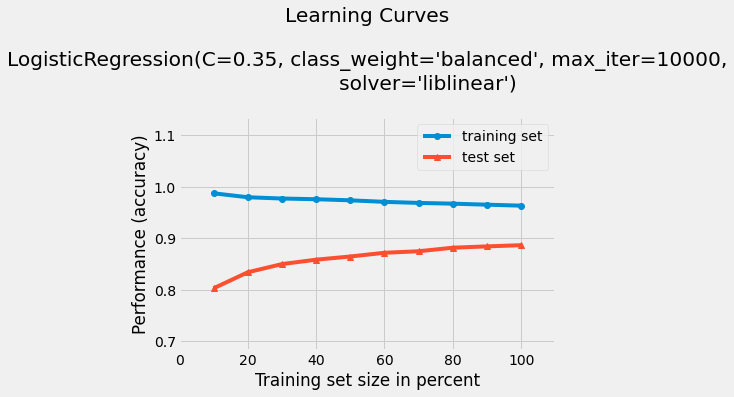

In [27]:
plot_learning_curves(X_train, y_train, X_test, y_test, Log_Ridge, scoring='accuracy')
plt.show()

Feature selection, what happens if we select K best features, how much accuracy we loose?

In [28]:
K = 5000

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2, k=K)

selector.fit(X_train, y_train)

vector_names = list(X_train.columns[selector.get_support(indices=True)])
print(vector_names)

['aad', 'aad group', 'abastari', 'abastari fmi', 'abbreviation', 'ability', 'ability modify', 'able', 'abra', 'abra all', 'abra firewall', 'abrnozomi', 'abrnozomi fmi', 'abrpcn', 'abrpcn patch', 'abuse', 'abuse hyper', 'abuse reported', 'abuseip', 'abuseipdb', 'acc', 'accenture', 'accenture resource', 'acceso', 'access', 'access add', 'access azure', 'access behavior', 'access cisco', 'access contractor', 'access controls', 'access denied', 'access hardware', 'access international', 'access justification', 'access longer', 'access management', 'access new', 'access perform', 'access plant', 'access please', 'access point', 'access points', 'access policy', 'access port', 'access process', 'access read', 'access requires', 'access resource', 'access review', 'access room', 'access sap', 'access shall', 'access share', 'access switch', 'access switches', 'access type', 'access usb', 'access view', 'access vlan', 'access voicemail', 'access webex', 'access work', 'accommodate', 'accommoda

In [30]:
X_train_best = X_train[vector_names]
X_test_best = X_test[vector_names]

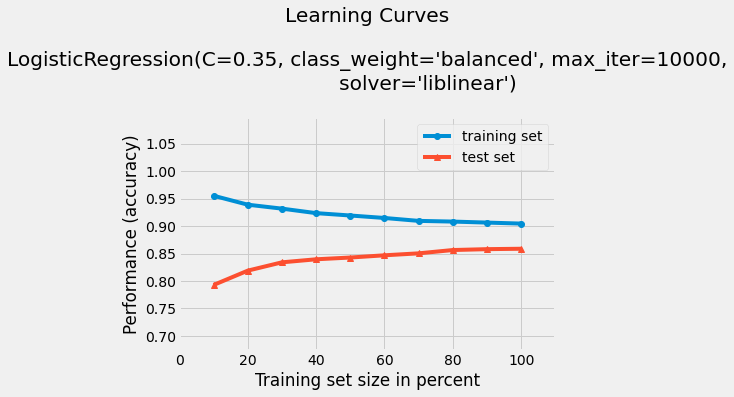

In [31]:
plot_learning_curves(X_train_best, y_train, X_test_best, y_test, Log_Ridge, scoring='accuracy')
plt.show()

Test set target distribution

In [32]:
from collections import Counter
Counter(y_test)

Counter({'Network': 700,
         'Access Management': 700,
         'Voice Communication': 598,
         'Deskside': 700,
         'Security': 700,
         'Operations': 700,
         'Application': 700,
         'Employee Status': 700,
         'Radio': 700,
         'Cloud': 540,
         'Process Control': 700,
         'Data Center': 700})

Confusion matrix, values and percentage

In [33]:
labels = pd.DataFrame(y_test)
labels.to_csv('cm_labels.csv',index=False)

In [37]:
y_pred = Log_Ridge.predict(X_test)

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Heatmap'),
 Text(0.5, 69.0, 'Predicted Label'),
 Text(114.0, 0.5, 'True Label')]

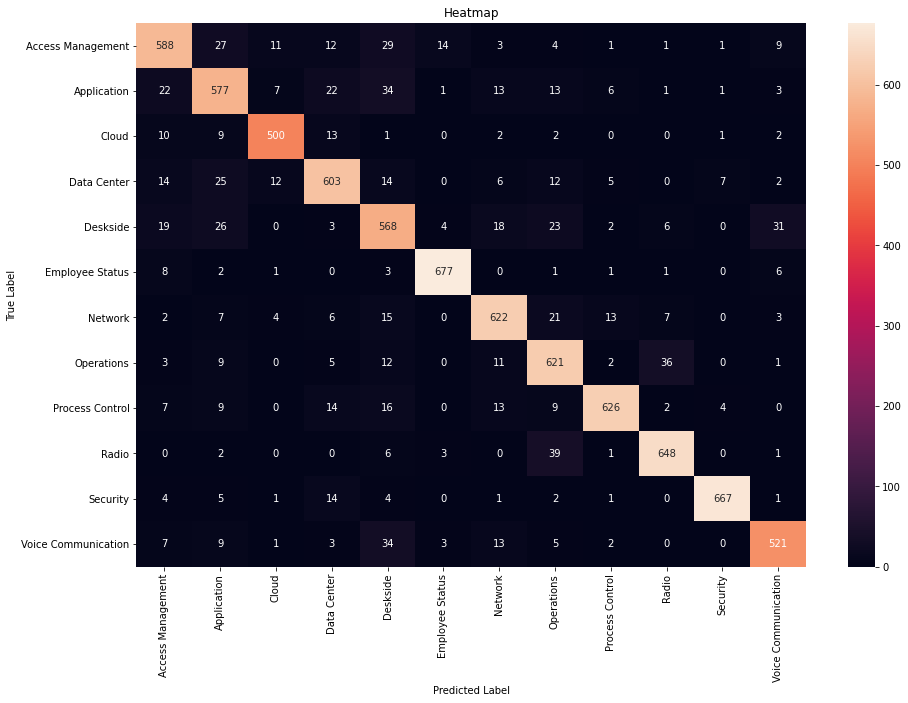

In [39]:
cm_labels = np.unique(y_test)
cm_array = confusion_matrix(y_test,y_pred)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_array_df, annot=True, fmt='g', xticklabels=True, yticklabels=True)
ax.set(title="Heatmap",
      xlabel="Predicted Label",
      ylabel="True Label")

[Text(0.5, 1.0, 'Heatmap'),
 Text(0.5, 69.0, 'Predicted Label'),
 Text(114.0, 0.5, 'True Label')]

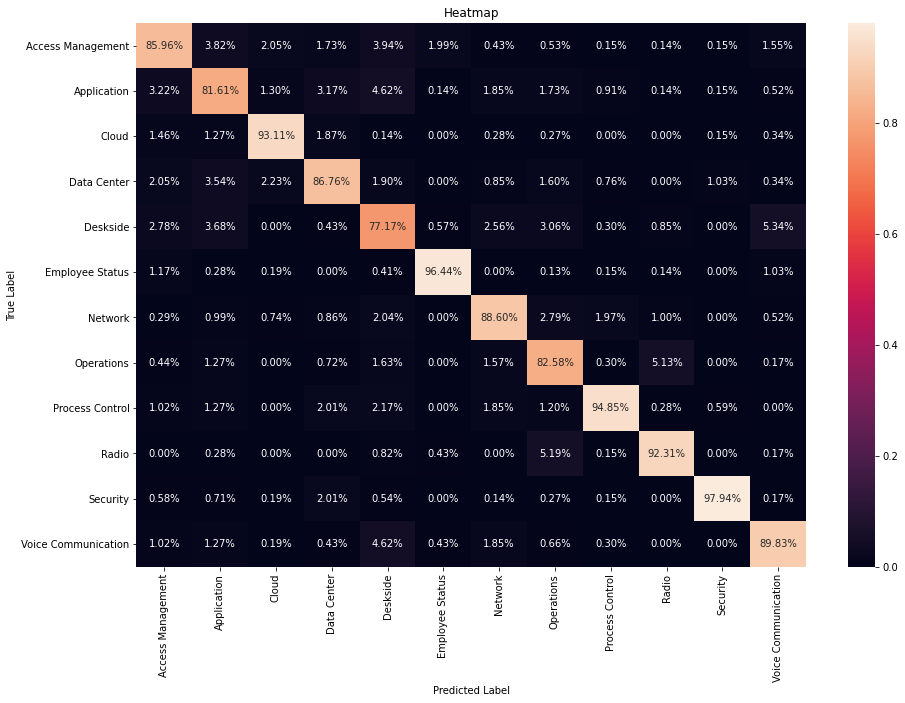

In [40]:
cm_labels = np.unique(y_test)

cm_array = confusion_matrix(y_test,y_pred)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_array_df/np.sum(cv_array_df), fmt='.2%', annot=True, xticklabels=True, yticklabels=True)
ax.set(title="Heatmap",
      xlabel="Predicted Label",
      ylabel="True Label")

Testing area

In [41]:
Test = 'Please update the mfa phone number of account .. 123 123asd'

In [42]:
Test = word_tokenize(Test)
Test = prepare_text(Test)
Test = tostr(Test)
TestExplainer = Test  #Save Test in this step to use it after in Explainer
Test = vectorizer.transform([Test])
Test

<1x15000 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [43]:
Log_Ridge.predict(Test)

array(['Access Management'], dtype=object)

Probabilities obtained for the predicted result:

In [44]:
prob = Log_Ridge.predict_proba(Test)
probas = pd.DataFrame()
probas['Category'] = cm_labels
probas['Prob'] = prob[0]
probas.sort_values('Prob', ascending=False)[0:].style.highlight_max(color = 'lightgreen', axis = 0)

,Category,Prob
0,Access Management,0.904897
4,Deskside,0.021286
11,Voice Communication,0.012903
1,Application,0.012375
7,Operations,0.010792
3,Data Center,0.008187
8,Process Control,0.007710
2,Cloud,0.005839
9,Radio,0.004593
5,Employee Status,0.004242


Explainer: what feature weights the most for each class

In [45]:
import eli5
explanation = eli5.show_weights(Log_Ridge, vec=vectorizer, top=20)

In [46]:
explanation

Explanation: for a particular observation, explain why the predicted value was what it was

In [47]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, Log_Ridge)

In [48]:
print(c.predict_proba(X_test[0:1]).round(3))

[[0.018 0.1   0.024 ... 0.085 0.007 0.056]
 [0.016 0.119 0.061 ... 0.066 0.008 0.035]
 [0.025 0.123 0.036 ... 0.093 0.009 0.042]
 ...
 [0.056 0.109 0.028 ... 0.087 0.013 0.057]
 [0.033 0.116 0.018 ... 0.084 0.008 0.055]
 [0.03  0.114 0.02  ... 0.06  0.01  0.079]]


In [49]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=np.unique(y_test))

In [50]:
exp = explainer.explain_instance(TestExplainer, c.predict_proba, num_features=10, top_labels=1)
print(exp.available_labels())

[0]


In [51]:
exp.show_in_notebook(text=True)

In [52]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html

In [22]:
import shap

In [ ]:
attrib_data = X_train[:200]
model = Log_Ridge
explainer = shap.Explainer(model, attrib_data)
num_explanations = 20
shap_vals = explainer.shap_values(X_test[:num_explanations])
words = processor._tokenizer.word_index
word_lookup = list()
for i in words.keys():
  word_lookup.append(i)
word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=tag_encoder.classes_)

In [ ]:
model = Log_Ridge
explainer = shap.Explainer(model, X_train[:200], feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test[:200])

In [ ]:
shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())